# OBJECTIVE #

1.   <b>APPLYING DECISION TREE WITH TFIDF VECTORIZATION

 *   FINDING THE BEST HYPERPARAMETER USING GRIDSEARCHCV WITH TRAIN DATA AND CROSS-VALIDATION DATA BY PLOTTING THE RESLUTS OF VAROIUS TRAIN DATA AND CROSS VALIDATION DATA
 * USING THE APROPRIATE VALUE OF HYPERPARAMETER ,TESTING ACCURACY ON TEST DATA
    USING F1-SCORE
 * PLOTTING THE CONFUSION MATRIX TO GET THE  PRECISOIN ,RECALL VALUE WITH HELP OF HEATMAP
  * PRINTING THE TOP 30 MOST IMPORTANT  FEATURES 
  <font>#


In [0]:
from sklearn.model_selection import train_test_split          #importing the necessary libraries
from sklearn.model_selection import RandomizedSearchCV
from sklearn.datasets import *
from sklearn import naive_bayes
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
import numpy as np
import pandas as pd
from sklearn import *
import warnings
warnings.filterwarnings("ignore")
from sklearn.tree import DecisionTreeClassifier


In [2]:
from google.colab import drive
drive.mount('/content/gdrive')#geeting the content from the google drive

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [0]:
final_processed_data=pd.read_csv("gdrive/My Drive/final_new_data.csv")#loading the preprocessed data  with 100k points into dataframe 

In [4]:
# getting the counts of 0 and 1 in "SCORE" column to know whether it is unbalanced data or not
count_of_1=0
count_of_0=0
for i in final_processed_data['Score']:
   if i==1:
    count_of_1+=1
   else:
    count_of_0+=1
print(count_of_1)
print(count_of_0)
#it is an imbalanced dataset

88521
11479


In [0]:
#spliiting the data into train and test data
x_train,x_test,y_train,y_test=model_selection.train_test_split(final_processed_data['CleanedText'].values,final_processed_data['Score'].values,test_size=0.2,shuffle=False)

In [6]:
vectorizer=TfidfVectorizer(min_df=2)#building the vertorizer with word counts equal and more then 2
train_tfidf=vectorizer.fit_transform(x_train)#fitting the model on training data
print(train_tfidf.shape)


(80000, 17204)


In [7]:
test_tfidf=vectorizer.transform(x_test)#fitting the bow model on test data
print("shape of x_test after bow vectorization ",test_tfidf.shape)

shape of x_test after bow vectorization  (20000, 17204)


In [0]:
#using time series split method for cross-validation score
from sklearn.model_selection import TimeSeriesSplit
tscv = TimeSeriesSplit(n_splits=5) 
from sklearn.tree import DecisionTreeClassifier




In [9]:
#biudling the model

dt=DecisionTreeClassifier(criterion='gini', splitter='best',class_weight={1:.5,0:.5})
tuned_parameters=[{'max_depth':[5,7,10,15,50],'min_samples_split':[5,25,50,100,500]}]
#applying the model of decision tree and using gridsearchcv to find the best hyper parameter
%time
from sklearn.model_selection import GridSearchCV
model = GridSearchCV(dt, tuned_parameters, scoring = 'f1', cv=tscv,n_jobs=-1)#building the gridsearchcv model


CPU times: user 3 µs, sys: 0 ns, total: 3 µs
Wall time: 6.44 µs


In [10]:
%%time
model.fit(train_tfidf, y_train)#fiitting the training data


CPU times: user 7.53 s, sys: 193 ms, total: 7.72 s
Wall time: 11min 16s


GridSearchCV(cv=TimeSeriesSplit(max_train_size=None, n_splits=5),
       error_score='raise-deprecating',
       estimator=DecisionTreeClassifier(class_weight={1: 0.5, 0: 0.5}, criterion='gini',
            max_depth=None, max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best'),
       fit_params=None, iid='warn', n_jobs=-1,
       param_grid=[{'max_depth': [5, 7, 10, 15, 50], 'min_samples_split': [5, 25, 50, 100, 500]}],
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='f1', verbose=0)

In [11]:
print(model.best_estimator_)#printing the best_estimator

DecisionTreeClassifier(class_weight={1: 0.5, 0: 0.5}, criterion='gini',
            max_depth=10, max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=25,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')


In [12]:
results=pd.DataFrame(model.cv_results_)# getting varoius cv_scores and train_scores various values of hyperparameter given as parameter and storing it in a dataframe
results#printing the dataframe

,mean_fit_time,mean_score_time,mean_test_score,mean_train_score,param_max_depth,param_min_samples_split,params,rank_test_score,split0_test_score,split0_train_score,...,split2_test_score,split2_train_score,split3_test_score,split3_train_score,split4_test_score,split4_train_score,std_fit_time,std_score_time,std_test_score,std_train_score
0,3.717103,0.049752,0.941827,0.946548,5,5,"{'max_depth': 5, 'min_samples_split': 5}",11,0.944819,0.945960,...,0.944017,0.946057,0.940239,0.945748,0.939157,0.946072,1.981083,0.003220,0.002202,0.001182
1,3.880105,0.050026,0.941762,0.946510,5,25,"{'max_depth': 5, 'min_samples_split': 25}",14,0.944658,0.945875,...,0.943860,0.946005,0.940201,0.945720,0.939033,0.946047,2.170351,0.003667,0.002153,0.001201
2,4.041946,0.045297,0.941781,0.946444,5,50,"{'max_depth': 5, 'min_samples_split': 50}",13,0.944616,0.945713,...,0.943903,0.946005,0.940239,0.945672,0.939033,0.945932,2.218418,0.002028,0.002140,0.001234
3,3.664768,0.047388,0.941798,0.946302,5,100,"{'max_depth': 5, 'min_samples_split': 100}",12,0.944750,0.945368,...,0.943979,0.945897,0.940158,0.945672,0.939033,0.945932,1.927706,0.004060,0.002206,0.001186
4,3.590582,0.047712,0.942471,0.945038,5,500,"{'max_depth': 5, 'min_samples_split': 500}",7,0.947985,0.943392,...,0.943539,0.945058,0.940248,0.944535,0.939442,0.944947,1.972160,0.003066,0.003080,0.001257
5,5.138468,0.051349,0.941456,0.949036,7,5,"{'max_depth': 7, 'min_samples_split': 5}",19,0.944598,0.949550,...,0.944303,0.948187,0.940442,0.948268,0.937267,0.948455,2.860290,0.005422,0.002727,0.000975
6,5.104313,0.048833,0.941458,0.948932,7,25,"{'max_depth': 7, 'min_samples_split': 25}",18,0.944556,0.949465,...,0.944588,0.948040,0.940485,0.948174,0.936992,0.948381,2.808465,0.005541,0.002860,0.000975
7,4.974762,0.045080,0.941550,0.948790,7,50,"{'max_depth': 7, 'min_samples_split': 50}",16,0.944708,0.949110,...,0.944716,0.948041,0.940528,0.948068,0.936997,0.948173,2.693570,0.003144,0.002909,0.000968
8,4.956825,0.046148,0.941510,0.948440,7,100,"{'max_depth': 7, 'min_samples_split': 100}",17,0.944652,0.948684,...,0.944162,0.947760,0.940619,0.948030,0.937212,0.947771,2.732653,0.003896,0.002703,0.000829
9,5.319208,0.057799,0.941709,0.946268,7,500,"{'max_depth': 7, 'min_samples_split': 500}",15,0.947143,0.945196,...,0.943066,0.946428,0.939632,0.945977,0.937700,0.946409,3.174555,0.018247,0.003233,0.000695


In [0]:
results['mean_train_score']=results['mean_train_score']*100
results['mean_test_score']=results['mean_test_score']*100

In [0]:
results=results.round(decimals=2)

In [0]:
results['mean_test_score']=100-results['mean_test_score']

# PLOTTING THE HEATMAP WITH  HYPERPARAMETERS FOR CV_ERROR SCORE 

In [0]:
test_score_heatmap=results.pivot(	'param_max_depth'	,'param_min_samples_split','mean_test_score'	)

In [22]:
test_score_heatmap

param_min_samples_split,5,25,50,100,500
param_max_depth,,,,,
5,5.82,5.82,5.82,5.82,5.75
7,5.85,5.85,5.84,5.85,5.83
10,5.70,5.70,5.70,5.71,5.81
15,5.74,5.74,5.76,5.76,5.87
50,6.35,6.44,6.48,6.41,6.49


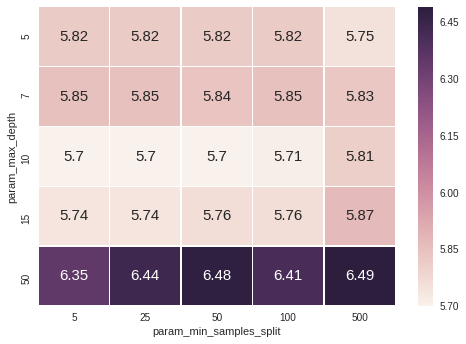

In [23]:
import seaborn as sns
sns.heatmap(test_score_heatmap,annot=True,annot_kws={"size": 15}, fmt='g',linewidths=.3)

In [19]:
print(model.best_estimator_)#printing the best_estimator

DecisionTreeClassifier(class_weight={1: 0.5, 0: 0.5}, criterion='gini',
            max_depth=10, max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=25,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')


# FROM THE ABOVE HEATMAPS RESULTS FOR  CV DATA,WE FOUND THAT BEST HYPERPARAMETERS AS MAX_DEPTH=10 AND MIN_SAMPLE_SPLIT=25

# PLOTTING THE ROC CURVE FOR GETTING AUC SCORE

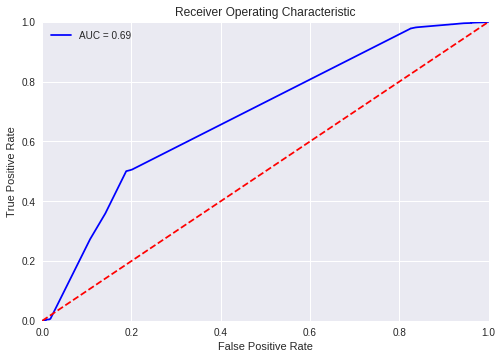

In [24]:
probs = model.predict_proba(test_tfidf)
preds = probs[:,1]
fpr, tpr, threshold = metrics.roc_curve(y_test, preds)
roc_auc = metrics.auc(fpr, tpr)

# 
import matplotlib.pyplot as plt
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'best')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [25]:
print('FROM THE ABOVE CURVE ,AUC SCORE IS FOUND AS',roc_auc*100)

FROM THE ABOVE CURVE ,AUC SCORE IS FOUND AS 68.58426022265147


# VISUALIZING DECISION TREE WITH GRAPHVIZ,FOR PLOTTING PURPOSE TAKING MAX_DEPTH AS 3

In [38]:
dt=DecisionTreeClassifier(criterion='gini', splitter='best',class_weight={1:.5,0:.5},min_samples_split=10,max_depth=3)
dt.fit(train_tfidf,y_train)#fitting the model 

DecisionTreeClassifier(class_weight={1: 0.5, 0: 0.5}, criterion='gini',
            max_depth=3, max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=10,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

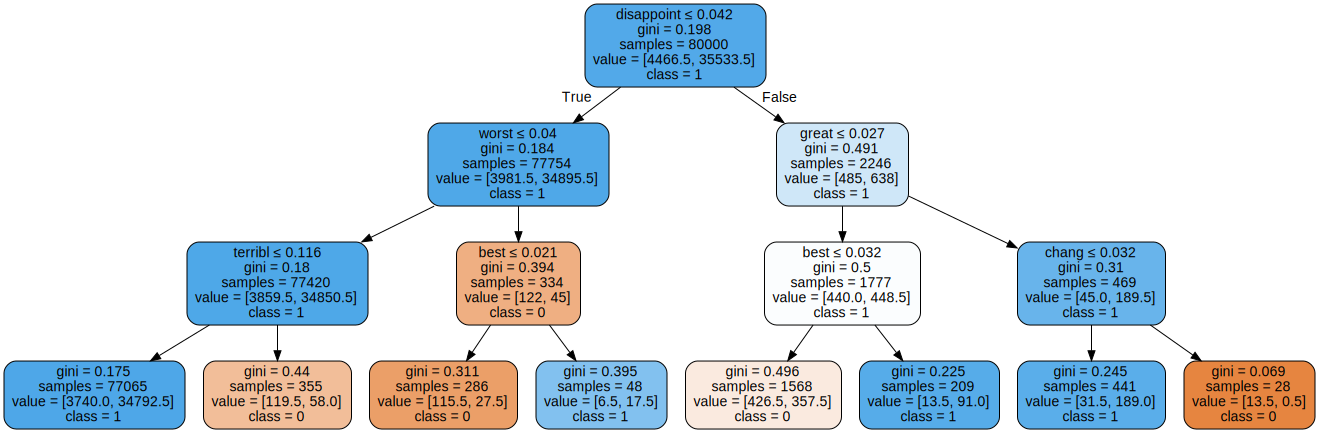

In [39]:
import graphviz 
target=['0','1']
dot_data = tree.export_graphviz(dt,out_file=None,feature_names=vectorizer.get_feature_names(),class_names=target,filled=True,rounded=True,special_characters=True) 
graph = graphviz.Source(dot_data)
graph

In [28]:
graph.render("gdrive/My Drive/decision_tree_tfidf") 

'gdrive/My Drive/decision_tree_tfidf.pdf'

# REPRESENTING TOP IMPORTANT FEATURES USING WORDCLOUD LIBRARY

In [34]:
dt=DecisionTreeClassifier(criterion='gini', splitter='best',class_weight={1:.5,0:.5},min_samples_split=25,max_depth=10)
dt.fit(train_tfidf,y_train)#fitting the model 
z=dt.feature_importances_
a=z.argsort()
print('shape of wieght vector is:',a.shape)
top_features=np.take(vectorizer.get_feature_names(),a[17180:])#taking last features as they are of very high importance 


shape of wieght vector is: (17204,)


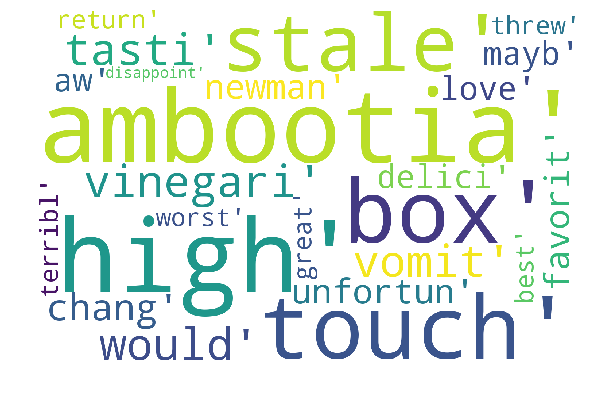

In [35]:
from wordcloud import WordCloud #here we are printing the top features using wordcloud library
import matplotlib.pyplot as plt
wordcloud = WordCloud(width = 1500, height = 1000, 
                background_color ='white', 
                 
                min_font_size = 10).generate(str(top_features)) 
  
# plot the WordCloud image                        
plt.figure(figsize = (8, 8), facecolor = None) 
plt.imshow(wordcloud) 
plt.axis("off") 
plt.tight_layout(pad = 0) 
  
plt.show() 

# TESTING OUR MODEL ON TEST DATA AND CHECKING ITS PRECISION ,RECALL ,F1_FCORE

Accuracy on test set: 87.765%
Precision on test set: 0.889
Recall on test set: 0.982
F1-Score on test set: 0.933
Confusion Matrix of test set:
 [ [TN  FP]
 [FN TP] ]



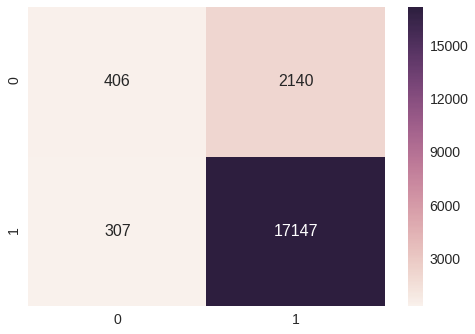

In [36]:
#Testing Accuracy on Test data  
import seaborn as sns #importing seaborn as sns
from sklearn.metrics import *#importing varoius metrics from sklearn
#building the model
y_pred = dt.predict(test_tfidf) 
print("Accuracy on test set: %0.3f%%"%(accuracy_score(y_test, y_pred)*100))#printing accuracy
print("Precision on test set: %0.3f"%(precision_score(y_test, y_pred)))#printing precision score
print("Recall on test set: %0.3f"%(recall_score(y_test, y_pred))) #printing recall
print("F1-Score on test set: %0.3f"%(f1_score(y_test, y_pred))) 
print("Confusion Matrix of test set:\n [ [TN  FP]\n [FN TP] ]\n") 
df_cm = pd.DataFrame(confusion_matrix(y_test, y_pred), range(2),range(2)) #generating the heatmap for confusion matrix
sns.set(font_scale=1.4)#for label size
sns.heatmap(df_cm, annot=True,annot_kws={"size": 16}, fmt='g')


# TFIDF VECTORIZATION FOR DECISION TREE IS COMPLETED 

In [0]:
#TFIDF vertorization is completed for decision_trees